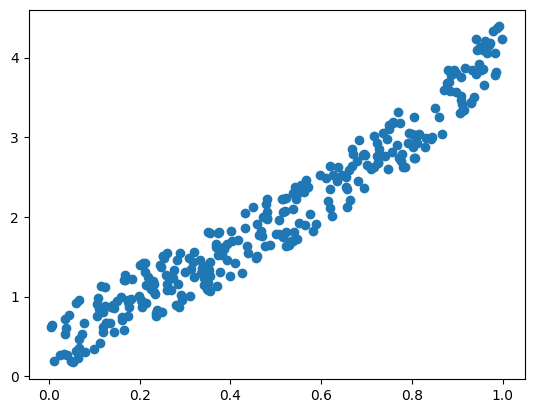

In [33]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

nsamples=300
x = np.random.rand(nsamples)
y = np.sin(x) * np.power(x,4) + 3*x + np.random.rand(nsamples)*0.8

plt.scatter(x, y)
plt.show()

In [34]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class PyTorchLinearRegression(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.linear_layer = torch.nn.Linear(num_inputs, num_outputs)

    def forward(self, X):
        return self.linear_layer(X)


linear_regression=PyTorchLinearRegression(1,1)


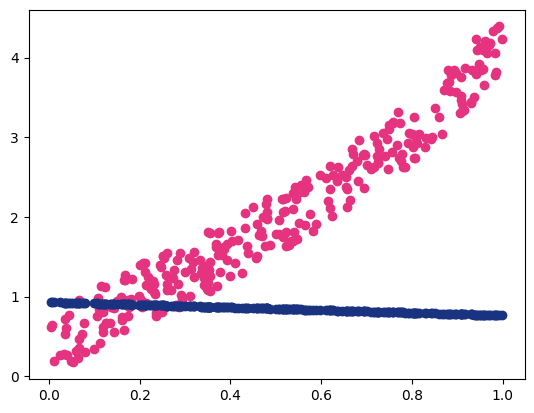

In [35]:


x_tensor=torch.transpose(torch.tensor(x,dtype=torch.float32).unsqueeze(0),0,1)
x_tensor.shape
y_pred=linear_regression(x_tensor)
plt.scatter(x,y,color=(0.9, 0.2, 0.5))
plt.scatter(x, y_pred.detach().numpy(),color=(0.1, 0.2, 0.5))
plt.show()

In [ ]:

from random import shuffle
y_tensor=torch.transpose(torch.tensor(y,dtype=torch.float32).unsqueeze(0),0,1)

def create_dummy_dataloader(x_tensor, y_tensor, batch_size=4):
    def create_batches(data):
        return [
            data[idx*batch_size: (idx+1) * batch_size] if (idx + 1) * batch_size < len(data)
            else data[idx*batch_size:]
            for idx in range(len(data) // batch_size)
        ]
    batched_X = create_batches(x_tensor)
    batched_y = create_batches(y_tensor)
    return list(zip(batched_X, batched_y))


def train(model, dataloader, epochs=20):
    optimiser = torch.optim.SGD(model.parameters(), lr=0.01)
    for epoch in range(epochs):
        shuffle(dataloader)
        for batch in dataloader:
            features, labels = batch
            prediction = model(features)
            loss = torch.nn.functional.mse_loss(prediction, labels)
            loss.backward()
            optimiser.step()
            optimiser.zero_grad()
        print("Loss:", loss.item())
        print()


dataloader = create_dummy_dataloader(x_tensor, y_tensor)
optimiser = torch.optim.SGD(linear_regression.parameters(), lr=0.01)
train(linear_regression, dataloader)

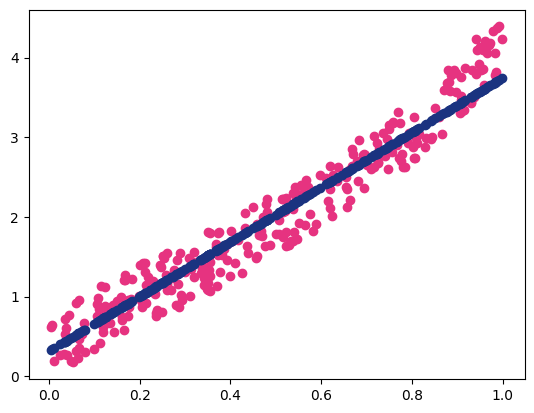

In [41]:
y_pred=linear_regression(x_tensor)
plt.scatter(x,y,color=(0.9, 0.2, 0.5))
plt.scatter(x, y_pred.detach().numpy(),color=(0.1, 0.2, 0.5))
plt.show()